In [ ]:
import numpy as np
from scipy.stats import spearmanr, kendalltau

def calculate_spearman_rank_correlation(x, f_x, g_x):
    # 将数据转换为秩次
    f_rank = np.argsort(f_x)
    g_rank = np.argsort(g_x)
    
    # 计算斯皮尔曼秩相关系数
    rho, _ = spearmanr(f_rank, g_rank)
    
    return rho

def calculate_kendall_rank_correlation(x, f_x, g_x):
    # 将数据转换为秩次
    f_rank = np.argsort(f_x)
    g_rank = np.argsort(g_x)
    
    # 计算肯德尔秩相关系数
    tau, _ = kendalltau(f_rank, g_rank)
    
    return tau

# 示例数据
x_values = np.array([1, 2, 3, 4, 5])
#f_values = np.array([2, 4, 3, 5, 1])
f_values = np.array([1, 2, 3, 4, 100])
#g_values = np.array([1, 3, 2, 5, 4])
g_values = np.array([1, 9, 17, 26, 34])

# 计算相关系数
spearman_corr = calculate_spearman_rank_correlation(x_values, f_values, g_values)
kendall_corr = calculate_kendall_rank_correlation(x_values, f_values, g_values)

print("斯皮尔曼秩相关系数:", spearman_corr)
print("肯德尔秩相关系数:", kendall_corr)


: 

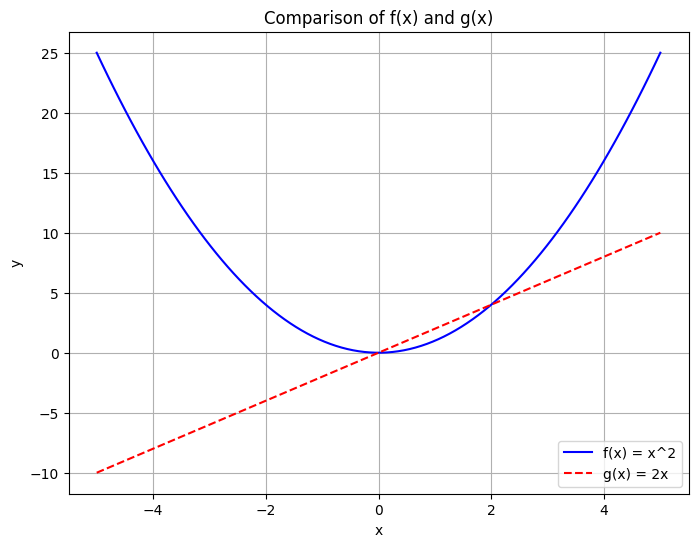

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x):
    return x**2

def g(x):
    return 2 * x

# 生成 x 值
x_values = np.linspace(-5, 5, 100)

# 计算对应的 y 值
f_values = f(x_values)
g_values = g(x_values)

# 画图
plt.figure(figsize=(8, 6))

plt.plot(x_values, f_values, label='f(x) = x^2', color='blue')
plt.plot(x_values, g_values, label='g(x) = 2x', color='red', linestyle='dashed')

plt.title('Comparison of f(x) and g(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()


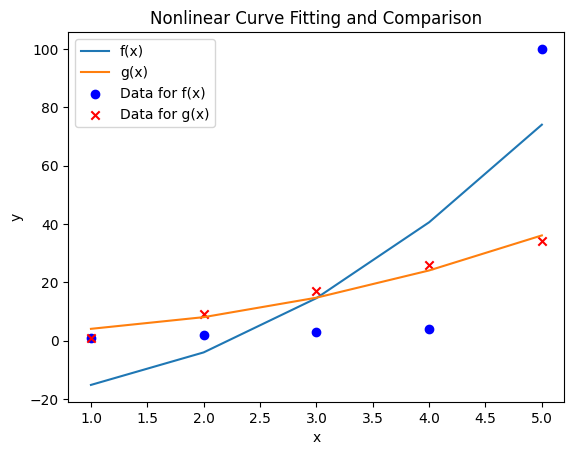

相关性系数: -0.9999999999999999


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# 定义两条非线性曲线
def f(x, a, b):
    return a * x**2 + b

def g(x, c, d):
    return c * x**2 + d

# 生成示例数据
#x_values = np.linspace(0, 5, 100)
#f_values = f(x_values, 2, 1) + np.random.normal(scale=1, size=len(x_values))
#g_values = g(x_values, 2, 1) + np.random.normal(scale=1, size=len(x_values))
x_values = np.array([1, 2, 3, 4, 5])
#f_values = np.array([2, 4, 3, 5, 1])
f_values = np.array([1, 2, 3, 4, 100])
#g_values = np.array([1, 3, 2, 5, 4])
g_values = np.array([1, 9, 17, 26, 34])

# 曲线拟合
params_f, _ = curve_fit(f, x_values, f_values)
params_g, _ = curve_fit(g, x_values, g_values)

# 提取参数
a_f, b_f = params_f
a_g, b_g = params_g

# 绘制拟合曲线
plt.plot(x_values, f(x_values, a_f, b_f), label='f(x)')
plt.plot(x_values, g(x_values, a_g, b_g), label='g(x)')
plt.scatter(x_values, f_values, color='blue', marker='o', label='Data for f(x)')
plt.scatter(x_values, g_values, color='red', marker='x', label='Data for g(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Curve Fitting and Comparison')
plt.show()

# 计算参数之间的相关性系数
correlation_coefficient, _ = spearmanr([a_f, b_f], [a_g, b_g])

print("相关性系数:", correlation_coefficient)


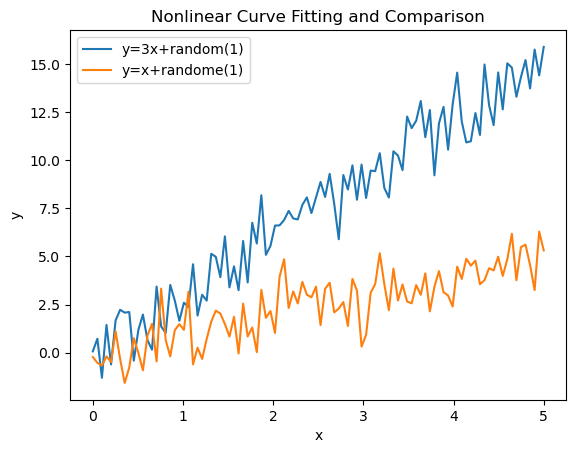

K-S 统计量: 0.59
K-S 检验 p 值: 1.7671447393730104e-16


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# 定义两条非线性曲线
def f(x):
    return x+1*np.random.normal(scale=1, size=len(x))

def g(x):
    return x+1*np.random.normal(scale=1, size=len(x))

# 生成示例数据
x_values = np.linspace(0, 5, 100)
f_values = f(x_values)
g_values = g(x_values)

# 计算差值
differences = f_values - g_values

# 绘制差值分布
plt.plot(x_values, f(x_values), label='y=x+random(1)')
plt.plot(x_values, g(x_values), label='y=x+randome(1)')
#plt.scatter(x_values, f_values, color='blue', marker='o', label='Data for f(x)')
#plt.scatter(x_values, g_values, color='red', marker='x', label='Data for g(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Curve Fitting and Comparison')
plt.show()

# 进行 Kolmogorov-Smirnov 检验
ks_statistic, ks_p_value = ks_2samp(f_values, g_values)

print("K-S 统计量:", ks_statistic)
print("K-S 检验 p 值:", ks_p_value)
